# Übung 12

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden wir uns mit daten-getriebener Modellierung mithilfe von Nächste Nachbarn Modellen beschäftigen. Nächste Nachbarn Modelle gehören zu den einfachsten Machine Learning Modellen. Viele weitere Modelle können Sie im Bachelor Kurs "Machine Learning" kennenlernen. Ich lade Sie herzlich dazu ein, sich für den Kurs Bachelorkurs "Machine Learning" anzumelden, sollten Sie Interesse haben.

###  12.1 Weinqualitäten (Multiklassen-Klassifikation, Feature Engineering)

* Diese Übung kennen Sie in abgewandelter Form aus der optionalen Übung 11.3. Falls Sie Übung 11.3 schon bearbeitet haben, können Sie sich von dort für eine Lösung hier inspirieren lassen.

In dieser Übung werden wir ein Nächste Nachbarn (NN) Modell erstellen, mit dem wir die Klasse eines Weines (d.h. die Kultursorte) aus den Eigenschaften vorhersagen können. Wir werden mit PCA-transformierten Merkmalen arbeiten.

**Ihre Daten**

Zu Beginn der 90er Jahre wurden verschiedene Weinproben in einer Region Italiens untersucht. Die Weine stammen von drei verschiedenen Kultursorten. Diese Kultursorten werden im unten hinterlegten Datensatz als Klasse 1, 2 und 3 (*class labels*) bezeichnet. Unter den 13 untersuchten Merkmalen finden Sie neben chemischen Eigenschaften (Alkoholgehalt, Säuregehalt) auch physikalische Eigenschaften (Farbintensität, etc).

Ich habe Ihnen den Weindatensatz in zwei Teile geteilt: Der erste Datensatz ist der sogenannte Trainingsdatensatz, mithilfe dessen Sie ihr Modell bauen werden. Der zweite Datensatz ist der sogenannte Testdatensatz, auf dem Sie ihr Modell anwenden und testen werden.

In [162]:
import numpy as np
import pandas as pd
import seaborn as sbn
import seaborn_image as isbn
from matplotlib import pyplot as plt
# from pandas.conftest import axis
from networkx import bipartite_layout
from scipy.ndimage import label
from sklearn.datasets import fetch_olivetti_faces
from skimage.exposure import adjust_gamma
from skimage.exposure import rescale_intensity
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import shortest_path
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
font =  {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

In [76]:
# import data
column_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = column_names

# preprocess data
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=10)

# apply PCA
pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

**Ihre Aufgaben**

(1) Importieren Sie die Daten, indem Sie die obere Code-Zelle ausführen.

(2) Vergegenwärtigen Sie sich die Eigenschaften des Wein-Datensatzes: Untersuchen Sie dazu das Pandas-Objekt. Welche Eigenschaften wurden für die Weine erfasst? Wie viele Weinproben wurden genommen?

In [4]:
print('Anzahl Weinprobe: %d\n'
      'zugehörige Feature: %s' %(len(y), df.columns.values[1:]))

Anzahl Weinprobe: 178
zugehörige Feature: ['Class label' 'Alcohol' 'Malic acid' 'Ash' 'Alcalinity of ash'
 'Magnesium' 'Total phenols' 'Flavanoids' 'Nonflavanoid phenols'
 'Proanthocyanins' 'Color intensity' 'Hue' 'OD280/OD315 of diluted wines'
 'Proline']


(3) Lesen Sie den Code ab dem Kommentar `# preprocess data`. Was passiert in diesen Code-Zeilen? Welches Feature-Engineering findet statt, bis wir zu den Daten `X_train_p, X_test_p` angekommen sind, mit denen Sie dann arbeiten werden? Wie viele Features (Merkmale) haben die transformierten Daten?

**Antwort:** Vom Datensatz ist erste zwei Spalte als Probe gewählt. Wie auch oben erwähnt wurde, die nächste Nachbarn(NN) Modelle startet.

In [12]:
print('training prob feature: %d\n'
      'test prob feature: %d' %(
    X_test_p.shape[1], X_train_p.shape[1]))

training prob feature: 2
test prob feature: 2


(4) Visualisieren Sie in zwei Scatterplots den PCA-transformierten Trainingsdatensatz sowie den Testdatensatz. Färben Sie die Punkte in beiden Plots ein gemäß der Klassenzugehörigkeit, wie Sie in Ihrem Vektor `y_train` bzw. `y_test` kodiert ist. Die Einträge in `y_train` und `y_test` werden auch *Labels* genannt.
* Hinweis: Vielleicht wollen Sie sich an Ihrem Code aus früheren Übungen bedienen, wo Sie eine ähnliche Aufgabe schon einmal gelöst haben.

Text(0.5, 1.0, 'Test')

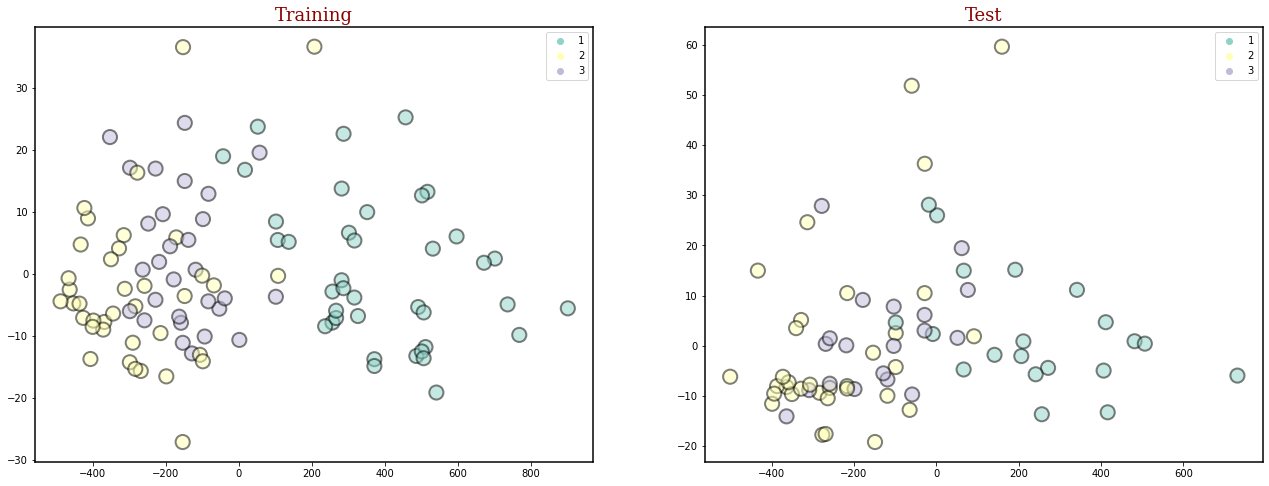

In [29]:
axs =  plt.subplots(figsize=(22,8), nrows=1, ncols=2)[1]
kwargs = {'edgecolor': "black",  # for edge color
          'linewidth': 2,  # line width of spot
    }
s_train =  sbn.scatterplot(x=X_train_p[:,0], y= X_train_p[:,1],sizes=(10,8), s=200, hue=y_train, palette='Set3',alpha=0.5, ax=axs[0], **kwargs)
s_train.set_title('Training', font)
s_test =   sbn.scatterplot(x=X_test_p[:,0], y= X_test_p[:,1],sizes=(10,8), s=200, hue=y_test, palette='Set3',alpha=0.5, ax=axs[1], **kwargs)
s_test.set_title('Test', font)

(5) Wir werden jetzt ein NN-Modell (Nächste Nachbarn Modell) erstellen. Schreiben Sie dazu eine Funktion mit dem Namen `NN`, die die Trainingsdaten (`X_train_p` und `y_train`) sowie die Testdaten (`X_test_p`) entgegen nimmt und die vorhergesagten Klassen (Labels) für die Testdaten als Vektor (`y_pred`) zurückgibt. Schlagen Sie in den Vorlesungsfolien nach, wie ein NN Modell definiert ist und nutzen Sie für die Implementierung numpy Funktionen. Broadcasting kann Ihnen ebenfalls sehr hilfreich sein.

In [83]:
def nearst_neighbor(x_tra_p, y_tra, x_test_p):
    labels = np.zeros(len(x_test_p))
    for i in range(0, len(x_test_p)):
        distance = np.zeros(len(x_tra_p))
        for j in range(len(x_tra_p)):
            distance[j] = np.linalg.norm(x_tra_p[j,:] - x_test_p[i,:])
        idx = np.argmin(distance)
        labels[i] = y_tra[idx]
    return labels

(6) Sie haben in Schritt (5) ein einfaches Machine Learning Modell implementiert, einen Klassifikator. Sagen Sie mithilfe Ihrer Funktion die Labels (Klassen) der Weinproben des Testdatensatzes voraus und speichern Sie die Voraussage im Vektor `y_pred`.

In [84]:
y_pred = nearst_neighbor(x_tra_p=X_train_p, y_tra=y_train, x_test_p=X_test_p)
y_pred

array([1., 2., 1., 2., 2., 2., 2., 1., 3., 1., 3., 2., 1., 2., 2., 3., 3.,
       1., 3., 3., 1., 3., 1., 1., 2., 3., 1., 2., 2., 2., 2., 3., 3., 3.,
       2., 1., 2., 2., 3., 2., 3., 3., 3., 2., 1., 2., 3., 2., 2., 3., 2.,
       2., 2., 1., 3., 3., 1., 2., 2., 1., 1., 2., 3., 2., 3., 2., 2., 2.,
       3., 3., 1., 1.])

(7) Bestimmen Sie die *Accuracy* Ihrer Vorhersage, also den Anteil der korrekt vorhergesagten Klassen dividiert durch die Gesamtanzahl aller Vorhersagen. Beurteilen Sie anhand der *Accuracy*, ob Ihr Modell die Klassen des Testdatensatzes gut vorhersagen kann.

In [85]:
acc = [(y_pred[i] == y_test[i])for i in range(len(y_test))].count(True)
accuracy = acc/len(y_test)
print(accuracy)

0.6944444444444444


In [95]:
#As function
def accuracy(v_predict, v_test):
    acc_times = [(v_predict[i] == v_test[i])for i in range(len(v_test))].count(True)
    return acc_times / len(v_test)

0.6944444444444444


(8) Wiederholen Sie Schritt (5), allerdings für Trainingsdaten, deren Features Sie auf Mittelwert $0$ und Varianz $1$ [normiert](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) haben. Welche Genauigkeit (Accuracy) erhalten Sie nun auf den Trainingsdaten? Wie erklären Sie sich diese Veränderung im Vergleich zu dem Ergebnis aus Schritt (7)?

In [87]:
#https://en.wikipedia.org/wiki/Standard_score#Calculation
x_train = stats.zscore(X_train)
x_test = stats.zscore(X_test)
# apply PCA
new_pca = PCA(n_components=2)
x_train_p = new_pca.fit_transform(x_train)
x_test_p = new_pca.transform(x_test)

In [88]:
# n: new
# ny_pred = nearst_neighbor(x_tra=x_train, y_tra=y_train, x_test_p=x_test_p)
ny_pred = nearst_neighbor(x_tra_p=x_train_p, y_tra=y_train, x_test_p=x_test_p)
print(ny_pred)

[2. 2. 1. 2. 1. 2. 2. 1. 3. 1. 1. 2. 1. 2. 2. 2. 3. 1. 2. 3. 1. 3. 1. 1.
 2. 3. 2. 3. 2. 2. 3. 3. 2. 3. 2. 1. 1. 2. 1. 2. 1. 1. 3. 2. 1. 2. 3. 2.
 2. 1. 3. 2. 3. 1. 3. 2. 1. 2. 3. 1. 1. 3. 3. 3. 3. 2. 2. 2. 3. 2. 1. 1.]


In [96]:
print(accuracy(v_predict=ny_pred, v_test=y_test))

0.9444444444444444


**Antwort:** wegen der Normierung der Daten erhalten wir bessere Genauigkeit und somit ist die Qualität des NN Model verbessert.

(9) Wir werden nun untersuchen, wie sich die *Accuracy* mit der Anzahl $k$ der nächsten Nachbarn ändert. Nutzen Sie die [Implementierung des kNN Modells von scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), um die Accuracy als Funktion von $k$ zu ermitteln ($k\in\{1, \ldots, 50\}$).

**Hinweise**

* Trainieren Sie Ihr Modell auf dem Trainingsset.
* Ermitteln Sie die Accuracies auf den Testsets.

In [108]:
# for  np.arange(1,51,1)
"""
trs: training set
acc: accuracy
"""
trs_acc = np.array([(KNeighborsClassifier(n_neighbors=i).fit(x_train_p, y_train),
        KNeighborsClassifier(n_neighbors=i).fit(x_train_p, y_train).score(
            x_test_p,y_test))  for i in range(1, 51,1)])
print(trs_acc[:,1])

[0.9444444444444444 0.9444444444444444 0.9444444444444444
 0.9027777777777778 0.9305555555555556 0.9027777777777778
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9166666666666666 0.9166666666666666 0.9166666666666666
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.9027777777777778
 0.9027777777777778 0.9027777777777778 0.8888888888888888
 0.9027777777777778 0.8888888888888888]


(10) Visualisieren Sie die Accuracy als Funktion von $k$. Bestimmen Sie den besten Wert $k$.

Text(0, 0.5, 'accuracy')

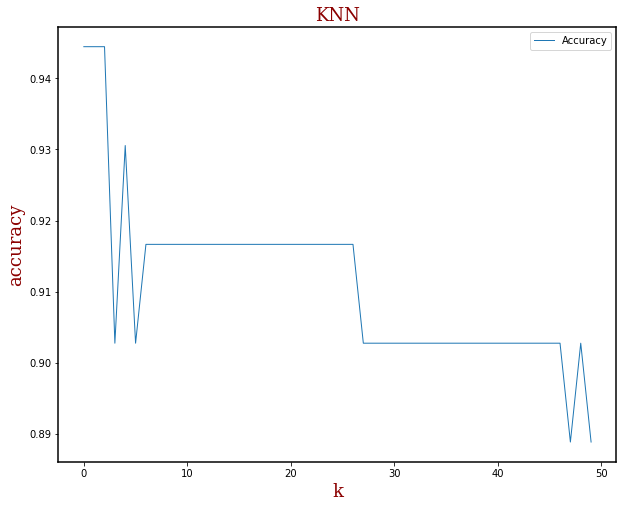

In [114]:
plt.figure(figsize=(10,8))
s_acc =sbn.lineplot(data=trs_acc[:,1], label='Accuracy', legend='full', lw=1)
s_acc.set_title('KNN', font)
s_acc.set_xlabel('k',font)
s_acc.set_ylabel('accuracy',font)

In [117]:
idx= trs_acc[:,1].argmax()
print('the best accuracy: %f is from k = %d' %(trs_acc[idx,1],idx+1))

the best accuracy: 0.944444 is from k = 1


Damit darf ich Ihnen gratulieren. Sie haben ein k-Nächste Nachbarn Modell an einen Datensatz angepasst.

### 12.2 k-nächste-Nachbarn Klassifikation
In dieser kurzen Übungsaufgabe werden Sie sich weiter mit dem kNN-Klassifikator vertraut machen und die Wirkung des Parameters $k$ untersuchen.

**Ihre Aufgaben**

(1) Visualisieren Sie die weiter unten erzeugten synthetischen Daten.

In [156]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02, ax= None):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    # plt.figure(figsize=(10,8))
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        sbn.scatterplot(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=np.expand_dims(cmap(idx), 0),
                    marker=markers[idx], label=cl,palette='Set3', ax=ax , **kwargs)


# generate 100 data points: features X, labels y
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=0.5, random_state=2)


<AxesSubplot:>

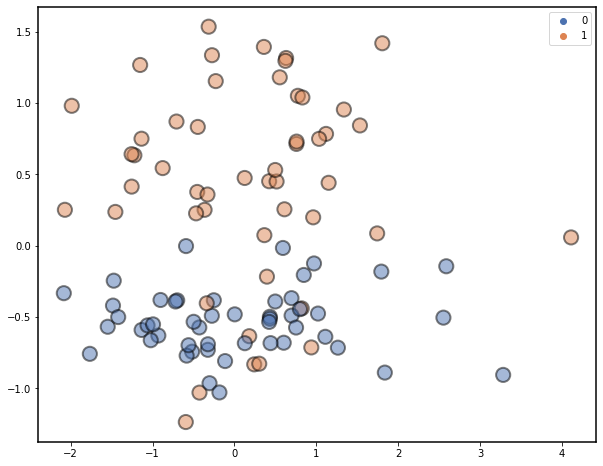

In [152]:
plt.figure(figsize=(10,8))
sbn.scatterplot(x=X[:,0], y=X[:,1], palette='deep',s=200, sizes=(10,8),hue=y, alpha=0.5, **kwargs)

(2) Fitten Sie einen [kNN-Klassifikator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) an die Daten mit $k=1$ und visualisieren Sie mit der Hilfsfunktion `plot_decision_regions` die entstandenen Entscheidungsflächen.

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


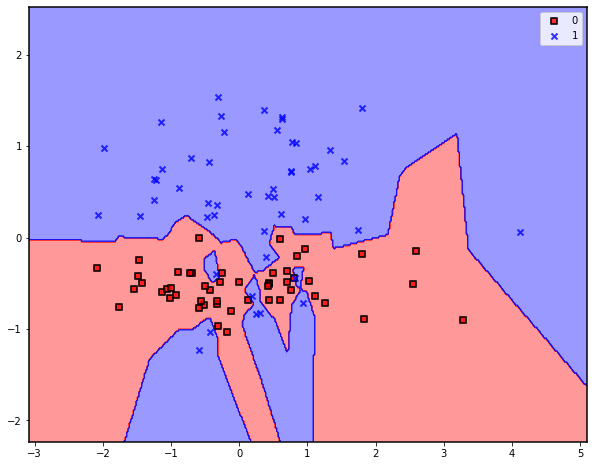

In [159]:
neighbor = KNeighborsClassifier(n_neighbors=1).fit(X, y)
plt.figure(figsize=(10,8))
plot_decision_regions(X,y,neighbor)

(3) Wiederholen Sie Schritt (2) für einige wenige Werte von $k$. Variieren Sie dabei $k$ zwischen $1$ und $50$. Wie verändern sich die Entscheidungsflächen? Wie verändert sich, Ihrer Meinung nach, die Komplexität des kNN-Modells mit dem Wert $k$?

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, 

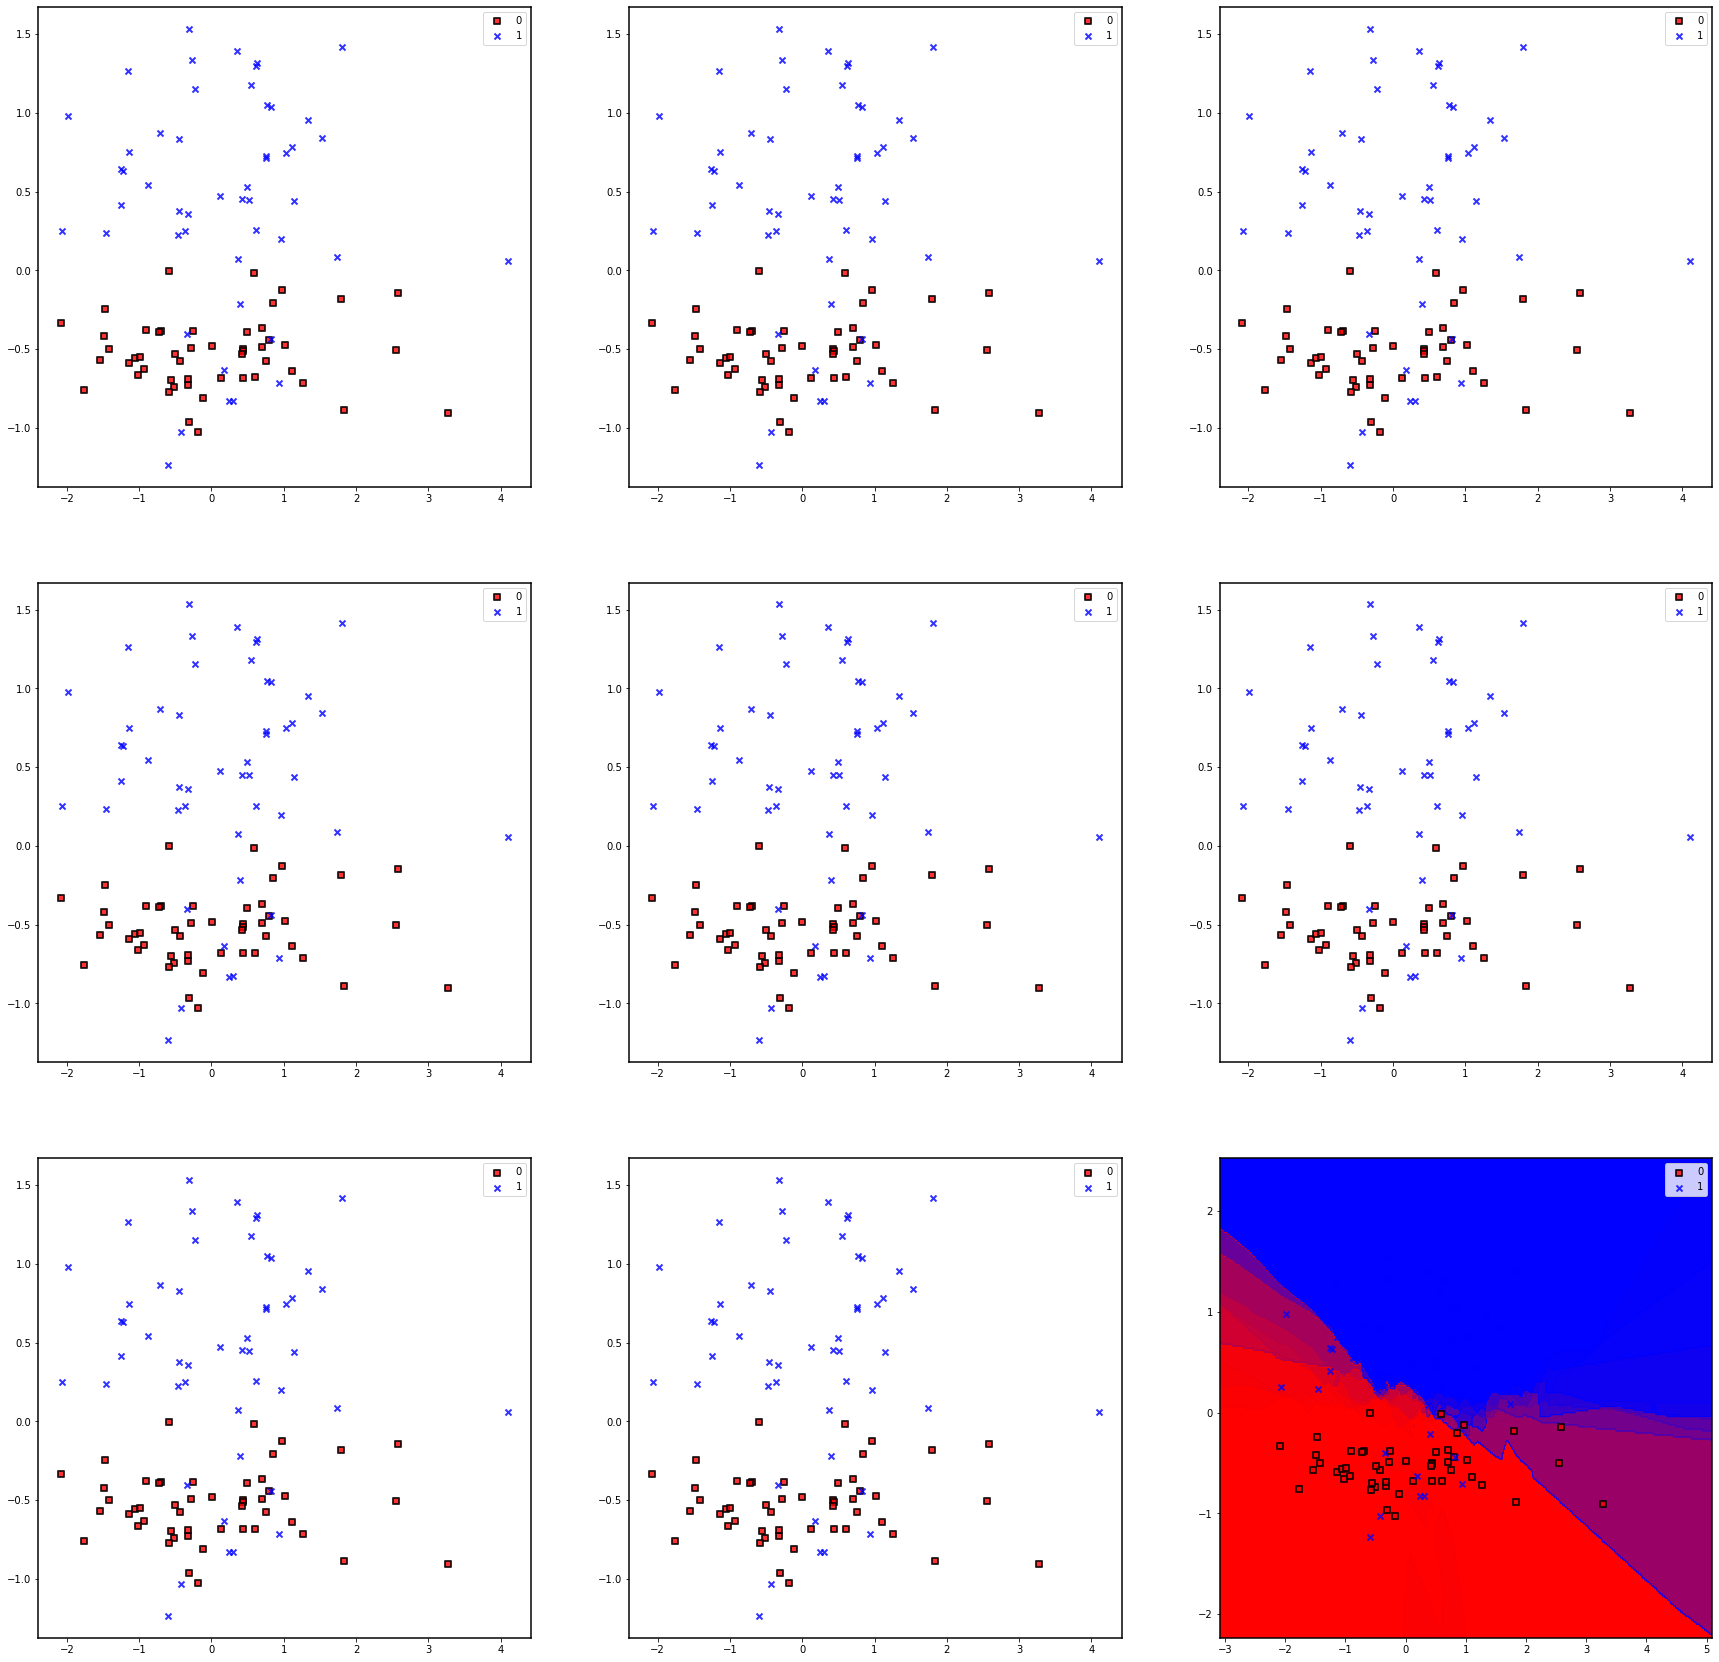

In [160]:
ks = np.arange(5,50,5)
axs = plt.subplots(nrows=3,ncols=3, figsize=(30,30))[1]
for k in ks:
    i = int((k -5)/15)
    j = (int(k/5)-1) % 3
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X,y)
    plot_decision_regions(X,y,neigh, ax=axs[i][j])

(4) Machen Sie Ihre Visualisierung aus Schritt (3) interaktiv, indem Sie [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) benutzen, und über einen Slider Werte für $k$ auswählen können.

In [164]:
@interact(k=widgets.IntSlider(min=1,max=50,step=1))
def plot(k):
    neighs= KNeighborsClassifier(n_neighbors=k).fit(X,y)
    plot_decision_regions(X, y, neighs)
    plt.show()

interactive(children=(IntSlider(value=1, description='k', max=50, min=1), Output()), _dom_classes=('widget-int…